# Objective

I'm crazy about basketball (Dub Nation!! loyal forever) so I decided to use NBA data to demonstrate some of my data processing visualization skills (and learn more about my favorite teams in the process)! 

I'm always excited about learning new ways to explore and share insights about datasets. I've been lucky to have instructors who used beautiful visualizations to inspire me to dig more into the data in interesting ways and from interesting angles, and now as a TA for a computer science class I strive to inspire my students in the same way!

# Dataset

I'm using a dataset I found on Kaggle (one of my favorite websites) that contains interesting data for NBA players in the 2016-2017 season, including on-court performance, salary, twitter engagement, and Wikipedia traffic data [1].

# Analyses

First, I do a **quick exploration of the dataset** in a series of visualizations that answer questions I've always been curious about.

Then, I **analyze patterns in the dataset using machine learning**, and see if it's possible to predict characteristics of certain players based on patterns characterizing other players.

Dataset license: CC BY-NC-SA 4.0

---

References:

[1] https://www.kaggle.com/noahgift/social-power-nba


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import math, os

## Loading the data

In [2]:
csv_name = 'nba_2016_2017_100.csv'
csv_path = './social-power-nba/%s' % csv_name

## Quick exploration of the data

In [3]:
raw_data = pd.read_csv(csv_path)
raw_data.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


Printing the names of the columns for convenience (so I don't have to scroll with the above dataframe):

In [4]:
raw_data.columns.values

array(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE',
       'GP', 'W', 'L', 'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'PACE', 'PIE', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG',
       'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK',
       'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK',
       'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK',
       'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'FGM_RANK',
       'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'CFID',
       'CFPARAMS', 'WIKIPEDIA_HANDLE', 'TWITTER_HANDLE',
       'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR',
       'TWITTER_FOLLOWER_COUNT_MILLIONS'], dtype=object)

### Question 1: How much money do NBA players make?

I wanted to visualize more clearly how valuable NBA players are to owners. In this analysis, I used salary as a metric for "vale to owners."

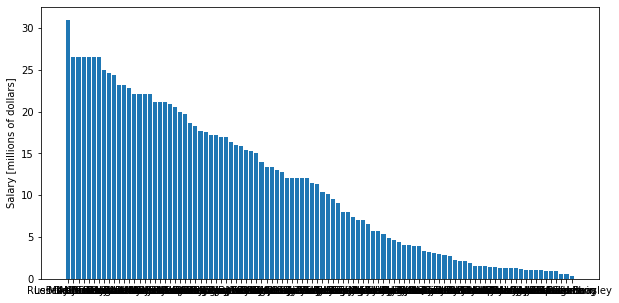

In [5]:
plt.figure(figsize=(10,5))
names_and_salaries = raw_data[['SALARY_MILLIONS', 'PLAYER_NAME']]
names_and_salaries = names_and_salaries.sort_values('SALARY_MILLIONS', ascending=False)
plt.bar(names_and_salaries['PLAYER_NAME'], names_and_salaries['SALARY_MILLIONS'])
plt.ylabel('Salary [millions of dollars]')
plt.show()

This bar chart with everyone is messy and it's hard to tell what's going on, so let's just take the top 20 salaries and sort them in descending order...

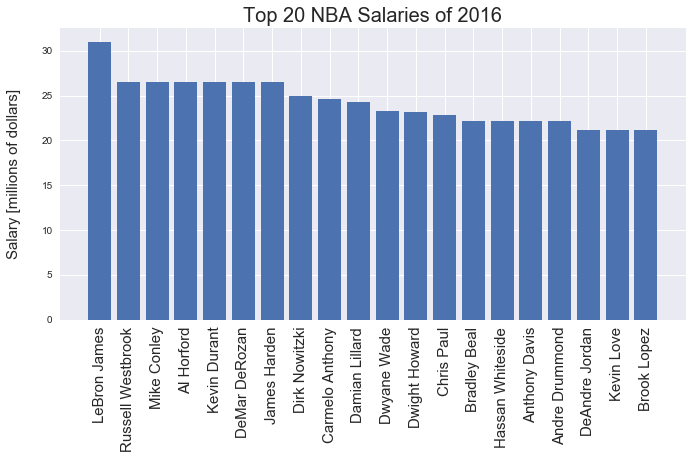

In [24]:
plt.figure(figsize=(10,5))
top_highest_paid = names_and_salaries[:20]
plt.bar(top_highest_paid['PLAYER_NAME'], top_highest_paid['SALARY_MILLIONS'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Top 20 NBA Salaries of 2016', fontsize=20)
plt.ylabel('Salary [millions of dollars]\n', fontsize=15)
plt.show()

A histogram is helpful to get a better sense of the distribution.

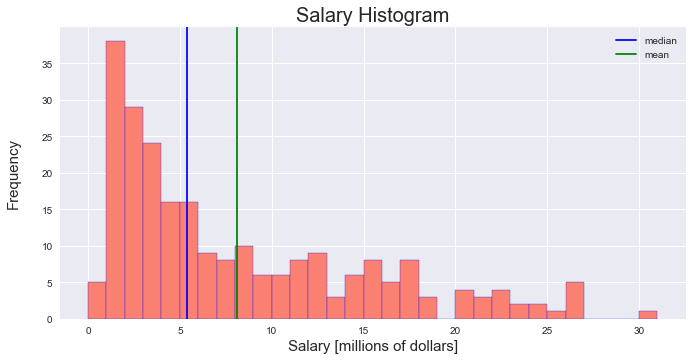

In [27]:
plt.figure(figsize=(10,5))
bin_width = 1
plt.hist(raw_data['SALARY_MILLIONS'], bins=np.arange(0, max(raw_data['SALARY_MILLIONS']) + bin_width, bin_width), 
        ec='blue', color='salmon')
plt.xlabel('Salary [millions of dollars]', fontsize=15)
plt.ylabel('Frequency\n', fontsize=15)
plt.title('Salary Histogram', fontsize=20)
mean_salary = np.mean(raw_data['SALARY_MILLIONS'])
median_salary = np.median(raw_data['SALARY_MILLIONS'])
plt.axvline(x=mean_salary, c='g')
plt.axvline(x=median_salary, c='b')
e1 = Line2D([0], [0], color='b', label='median')
e2 = Line2D([0], [0], color='g', label='mean')
plt.legend(handles=[e1,e2])
plt.show()

A boxplot is another useful way to get a sense of the distribution.

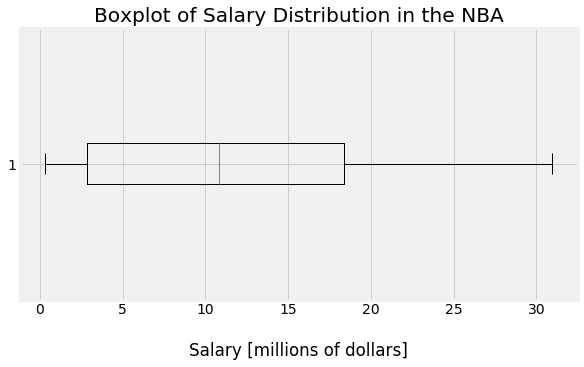

In [8]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.boxplot(raw_data['SALARY_MILLIONS'], vert=False)
plt.xlabel('\nSalary [millions of dollars]')
plt.title('Boxplot of Salary Distribution in the NBA')
plt.show()

### Answer 1: A lot!

The NBA players on this list seem to be very valuable to their franchise owners. As an NBA player, you're well-compensated, especially when you're LeBron.

### Question 2: Do more famous players get paid a lot more?

I wanted to get a sense of whether players that bring a bigger name to their franchise get paid more, on a consistent basis. In this analysis, I used the number of Twitter followers as a metric for "fame."

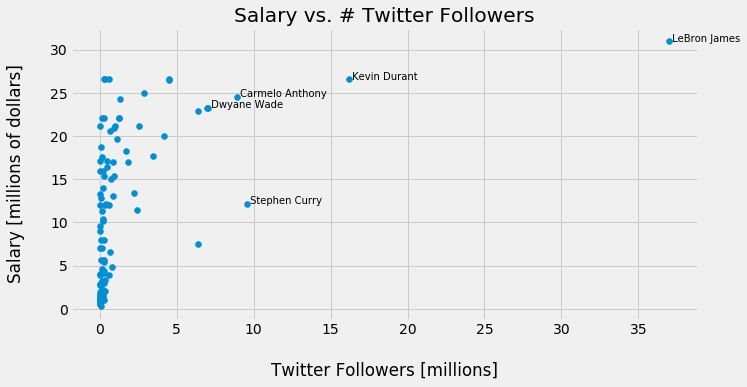

In [9]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')

plt.title('Salary vs. # Twitter Followers')
plt.scatter(raw_data['TWITTER_FOLLOWER_COUNT_MILLIONS'], raw_data['SALARY_MILLIONS'])
plt.xlabel('\nTwitter Followers [millions]')
plt.ylabel('Salary [millions of dollars]\n')

# Show the names of all players who have more than 7 million Twitter followers 
min_num_followers = 7
for i, name in enumerate(raw_data['PLAYER_NAME']):
    if raw_data['TWITTER_FOLLOWER_COUNT_MILLIONS'][i] > min_num_followers:
        plt.annotate(' %s' % name, (raw_data['TWITTER_FOLLOWER_COUNT_MILLIONS'][i], raw_data['SALARY_MILLIONS'][i]), fontsize=10)


### Answer 2: Sometimes.

According to this data, franchises do not seem to reward players for their fame consistently! Steph clearly is one of standout players in terms of Twitter followers, but a lot of players make more money than him. (I do think Steph makes at least a little more money than this data shows, though...)

In [10]:
warriors = raw_data[raw_data['TEAM_ABBREVIATION'] == 'GSW']
warriors

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
5,201142,Kevin Durant,1610612744,GSW,28,62,51,11,0.823,33.4,...,22,53,5,"2,011,421,610,612,740",Kevin_Durant,KDTrey5,26.54,25.1,1,16.200
28,201939,Stephen Curry,1610612744,GSW,29,79,65,14,0.823,33.4,...,14,162,5,"2,019,391,610,612,740",Stephen_Curry,stephencurry30,12.11,25.3,1,9.560
64,201580,JaVale McGee,1610612744,GSW,29,77,62,15,0.805,9.6,...,331,11,5,"2,015,801,610,612,740",JaVale_McGee,javalemcgee34,1.40,6.1,1,0.193
72,2561,David West,1610612744,GSW,36,68,56,12,0.824,12.6,...,363,56,5,"25,611,610,612,744",David_West_(basketball),d_west30,1.55,4.6,1,0.235
86,203110,Draymond Green,1610612744,GSW,27,76,62,14,0.816,32.5,...,139,311,5,"2,031,101,610,612,740",Draymond_Green,money23green,15.33,10.2,1,0.911


Finally, of the five Warriors players listed in this dataset, I wanted to see who was taking up how much of their combined salaries.

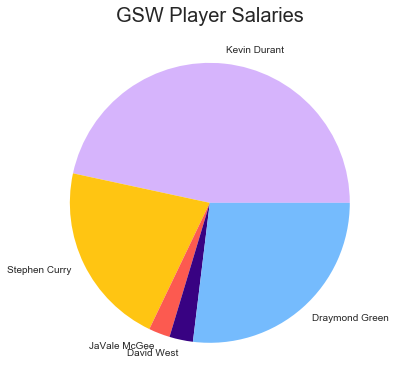

In [11]:
plt.style.use('seaborn')
fig = plt.figure(figsize = (6,6))
sizes = warriors['SALARY_MILLIONS']
labels = warriors['PLAYER_NAME']
colors = ["xkcd:light violet", "xkcd:sunflower", "xkcd:coral", "xkcd:indigo", 'xkcd:sky blue']
plt.pie(sizes, labels = labels, colors = colors)
plt.title('GSW Player Salaries', fontsize=20)
plt.show()

## Loading more NBA data!
(from the same dataset)

In [12]:
csv_name = 'nba_2017_players_with_salary_wiki_twitter.csv'
csv_path = './social-power-nba/%s' % csv_name
raw_data = pd.read_csv(csv_path)
raw_data.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [13]:
raw_data = pd.read_csv(csv_path)
raw_data.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


### Question 3: Can we cluster players according to their popularity on Twitter and/or Wikipedia?

As a metric for popularity on Twitter, I am using "number of favorites counted" + "number of retweets".

As a metric for popularity on Wikipedia, I am using "number of pageviews."

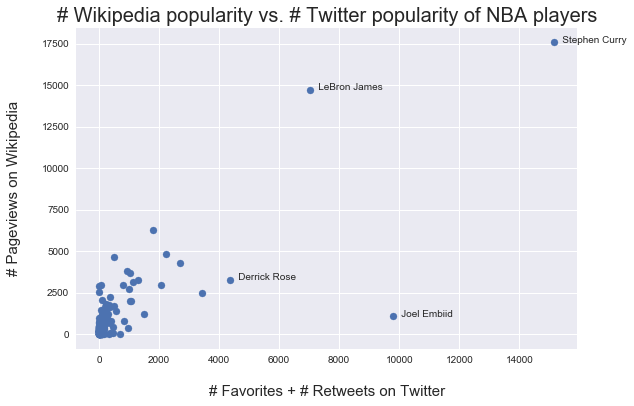

In [28]:
twitter_favorite_count = raw_data['TWITTER_FAVORITE_COUNT']
twitter_retweet_count = raw_data['TWITTER_RETWEET_COUNT']
twitter_popularity_index = twitter_favorite_count + twitter_retweet_count
wikipedia_popularity_index = raw_data['PAGEVIEWS']

plt.scatter(twitter_popularity_index, wikipedia_popularity_index)
plt.xlabel('\n# Favorites + # Retweets on Twitter', fontsize=15)
plt.ylabel('# Pageviews on Wikipedia\n', fontsize=15)
plt.title('# Wikipedia popularity vs. # Twitter popularity of NBA players', fontsize=20)

min_twitter_popularity_index = 4000
for i, name in enumerate(raw_data['PLAYER']):
    if twitter_popularity_index[i] > min_twitter_popularity_index:
        plt.annotate('   %s' % name, (twitter_popularity_index[i], wikipedia_popularity_index[i]), fontsize=10)

plt.show()

### Answer 3: There are no clear groups of NBA players who are more popular on Twitter or more popular on Wikipedia.

It doesn't seem like it would make sense to do clustering. 

### Question 4: Are high-impact players being utilized appropriately?

As a metric for player impact on team, I used the number of wins attributed to individual player performance.

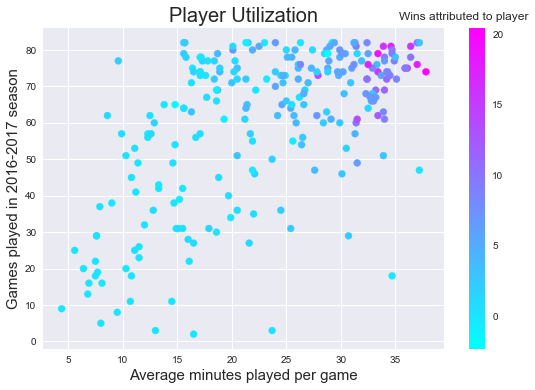

In [30]:
plt.scatter(raw_data['MPG'], raw_data['GP'], c=raw_data['WINS_RPM'], cmap='cool')
clb = plt.colorbar()
clb.set_label('Wins attributed to player', labelpad=-40, y=1.05, rotation=0, fontsize=12)

plt.xlabel('Average minutes played per game', fontsize=15)
plt.ylabel('Games played in 2016-2017 season', fontsize=15)
plt.title('Player Utilization', fontsize=20)
plt.show()

In [16]:
highly_utilized_players = []
for i, name in enumerate(raw_data['PLAYER']):
    if raw_data['MPG'][i] > np.percentile(raw_data['MPG'], 75):
        if raw_data['GP'][i] > np.percentile(raw_data['GP'], 75):
            highly_utilized_players.append(name)

In [17]:
impact_list = []
for player in highly_utilized_players:
    impact_list.append(raw_data.loc[raw_data['PLAYER'] == player, 'WINS_RPM'].iloc[0])

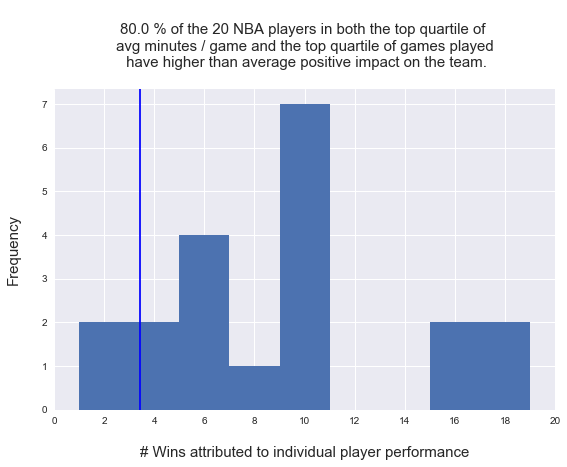

In [35]:
plt.hist(impact_list, bins=np.arange(1, 21, 2))
plt.xticks(np.arange(0, 21, 2))

avg_impact = np.mean(raw_data['WINS_RPM'])
plt.axvline(x=avg_impact, c='b')
n = len(highly_utilized_players)
percent = 100 * (len([x for x in impact_list if x > avg_impact])) / n
plt.xlabel('\n# Wins attributed to individual player performance', fontsize=15)
plt.ylabel('Frequency\n', fontsize=15)
plt.title('\n%s %% of the %s NBA players in both the top quartile of \n avg minutes / game and the top quartile of games played \n have higher than average positive impact on the team.\n' % (str(percent), str(n)), fontsize=15)
plt.show()

### Answer 4: Yes, usually.

High-impact players tend to spend more time and more games on the court. This observation is intuitive. A suprising result from this dataset, however, is that one-fifth of the twenty NBA who were on the court for the most time and games had less impact on the team than the average across the entire dataset (239 players).